<a href="https://colab.research.google.com/github/AhzamAhmed6/FashionMNIST-using-CNN/blob/main/27PyTorch_CNN_Fashion_MNIST.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import torch.nn as nn
import torch
import matplotlib.pyplot as plt
import numpy as np
import torchvision
import torchvision.transforms as transforms

In [2]:
train_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    download=True,
    train=True,
    transform=transforms.ToTensor()
)

  0%|          | 0/26421880 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/29515 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/train-labels-idx1-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/4422102 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-images-idx3-ubyte.gz to ./FashionMNIST/raw



  0%|          | 0/5148 [00:00<?, ?it/s]

Extracting ./FashionMNIST/raw/t10k-labels-idx1-ubyte.gz to ./FashionMNIST/raw



In [3]:
test_dataset = torchvision.datasets.FashionMNIST(
    root='.',
    download=True,
    train=False,
    transform=transforms.ToTensor()
)

In [4]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

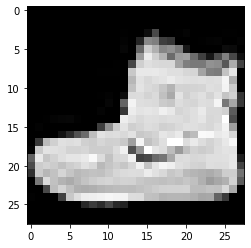

In [5]:
plt.imshow(train_dataset.data[0], cmap='gray');

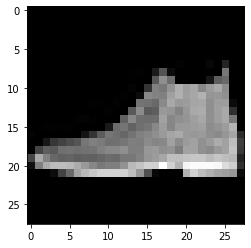

In [6]:
plt.imshow(test_dataset.data[0], cmap='gray');

In [7]:
train_dataset.data.shape

torch.Size([60000, 28, 28])

In [8]:
K = len(set(train_dataset.targets.numpy()))
N = len(train_dataset.targets)
D = 28*28

In [9]:
batch_size=128
train_loader = torch.utils.data.DataLoader(train_dataset,
                                           batch_size=batch_size,
                                           shuffle=True)
test_loader = torch.utils.data.DataLoader(test_dataset,
                                           batch_size=batch_size,
                                           shuffle=False)

In [10]:
for images, labels in train_loader:
  print(images.shape)
  break

torch.Size([128, 1, 28, 28])


In [15]:
k = len(set(train_dataset.targets.numpy()))
k

10

In [24]:
model = nn.Sequential(
    nn.Conv2d(in_channels=1, out_channels=8, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(in_channels=8, out_channels=16, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Conv2d(in_channels=16, out_channels=32, kernel_size=3),
    nn.ReLU(),
    nn.MaxPool2d(2, 2),
    nn.Flatten(-1, 16*5*5),
    nn.Linear(16*5*5, 300),
    nn.ReLU(),
    nn.Linear(300, k)
)

In [18]:
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [19]:
device = torch.device('cuda:0' if torch.cuda.is_available() else 'cpu')
model.to(device)

Sequential(
  (0): Conv2d(1, 8, kernel_size=(3, 3), stride=(1, 1))
  (1): ReLU()
  (2): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (3): Conv2d(8, 16, kernel_size=(3, 3), stride=(1, 1))
  (4): ReLU()
  (5): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (6): Conv2d(16, 32, kernel_size=(3, 3), stride=(1, 1))
  (7): ReLU()
  (8): MaxPool2d(kernel_size=2, stride=2, padding=0, dilation=1, ceil_mode=False)
  (9): Flatten(start_dim=-1, end_dim=400)
  (10): Linear(in_features=400, out_features=300, bias=True)
  (11): ReLU()
  (12): Linear(in_features=300, out_features=10, bias=True)
)

In [25]:
epochs=10
def training(epochs, train_loader, test_loader, criterion, optimizer, model):
  
  train_losses=np.zeros(epochs)
  test_losses=np.zeros(epochs)
  for i in range(epochs):
    train_loss=[]
    for input, target in train_loader:
      input, target = input.to(device), target.to(device)
      optimizer.zero_grad()
      outputs = model(input)
      loss = criterion(output, target)
      train_loss.append(loss)
      loss.backward()
      optimizer.step()
    train_losses[i] = train_loss.mean()
    
    test_loss=[]
    for input, target in test_loader:
      input, target = input.to(device), target.to(device)
      optimizer.zero_grad()
      outputs = model(input)
      loss = criterion(output, target)
      test_loss.append(loss)
      loss.backward()
      optimizer.step()
    test_losses[i] = test_loss.mean()
    print(f'Train Loss= {train_loss}, Test Loss= {test_loss}')
  return train_losses, test_losses

In [26]:
train_losses, test_losses = training(epochs, train_loader, test_loader, criterion, optimizer, model)

IndexError: ignored